In [ ]:
# Sikkim Business Success Predictor - Full ML Model Trainer (Google Colab Ready)

# 📌 Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

In [ ]:
print(df.columns.tolist())


['location_id', 'latitude', 'longitude', 'district', 'locality_name', 'locality_type', 'nearest_city', 'population_density_sq_km', 'average_household_income_usd', 'median_age', 'literacy_rate_percent', 'male_female_ratio', 'average_foot_traffic_daily', 'commercial_rent_per_sq_ft_usd', 'avg_residential_price_sq_ft_usd', 'availability_score', 'infrastructure_score', 'crime_rate_index', 'climate_resilience_score', 'accessibility_score', 'proximity_to_tourist_attractions_km', 'local_economic_activity_index', 'tourism_score', 'online_reviews_avg_rating', 'market_growth_potential', 'num_hotel_homestay_1km', 'num_restaurant_cafe_1km', 'num_souvenir_shop_1km', 'num_trekking_agency_1km', 'num_grocery_store_1km', 'num_pharmacy_1km', 'num_vehicle_rental_1km', 'num_local_craft_shop_1km', 'total_competitors_1km', 'competition_index', 'estimated_monthly_revenue_usd', 'estimated_monthly_operating_cost_usd', 'estimated_monthly_profit_usd', 'business_attractiveness_score', 'risk_level', 'recommended_bu

In [ ]:
# 📂 Load Dataset
path = "geo_smart_advisor/data/sikkim_simulated_business_data.csv"
df = pd.read_csv(path)
df.head()

# 📌 Feature Selection
features = [
    'latitude',
    'longitude',
    'population_density_sq_km',
    'average_household_income_usd',
    'literacy_rate_percent',
    'average_foot_traffic_daily',
    'commercial_rent_per_sq_ft_usd',
    'availability_score',
    'infrastructure_score',
    'crime_rate_index',
    'climate_resilience_score',
    'accessibility_score',
    'proximity_to_tourist_attractions_km',
    'local_economic_activity_index',
    'tourism_score',
    'online_reviews_avg_rating',
    'market_growth_potential', # This is a categorical feature
    'total_competitors_1km',
    'competition_index'
]

# 🎯 Target
target = 'estimated_monthly_profit_usd'

# Select features and target
X = df[features]
y = df[target]

# Handle categorical features using one-hot encoding
X = pd.get_dummies(X, columns=['market_growth_potential'], drop_first=True)


# 📈 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📊 Initialize Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector': SVR(),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

results = {}

In [ ]:
# 🔁 Train and Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        'r2_score': r2,
        'mae': mae,
        'mse': mse,
        'model': model
    }

# Print results
print("Model Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  R2 Score: {metrics['r2_score']:.4f}")
    print(f"  MAE: {metrics['mae']:.4f}")
    print(f"  MSE: {metrics['mse']:.4f}")

Model Evaluation Results:

Linear Regression:
  R2 Score: 0.3032
  MAE: 3530.0244
  MSE: 19308436.6923

Random Forest:
  R2 Score: 0.2594
  MAE: 3670.5647
  MSE: 20522170.1580

Gradient Boosting:
  R2 Score: 0.2877
  MAE: 3575.7350
  MSE: 19736022.4944

Support Vector:
  R2 Score: -0.0238
  MAE: 4068.2325
  MSE: 28369437.4775

MLP Regressor:
  R2 Score: 0.2017
  MAE: 3864.3173
  MSE: 22119706.2667


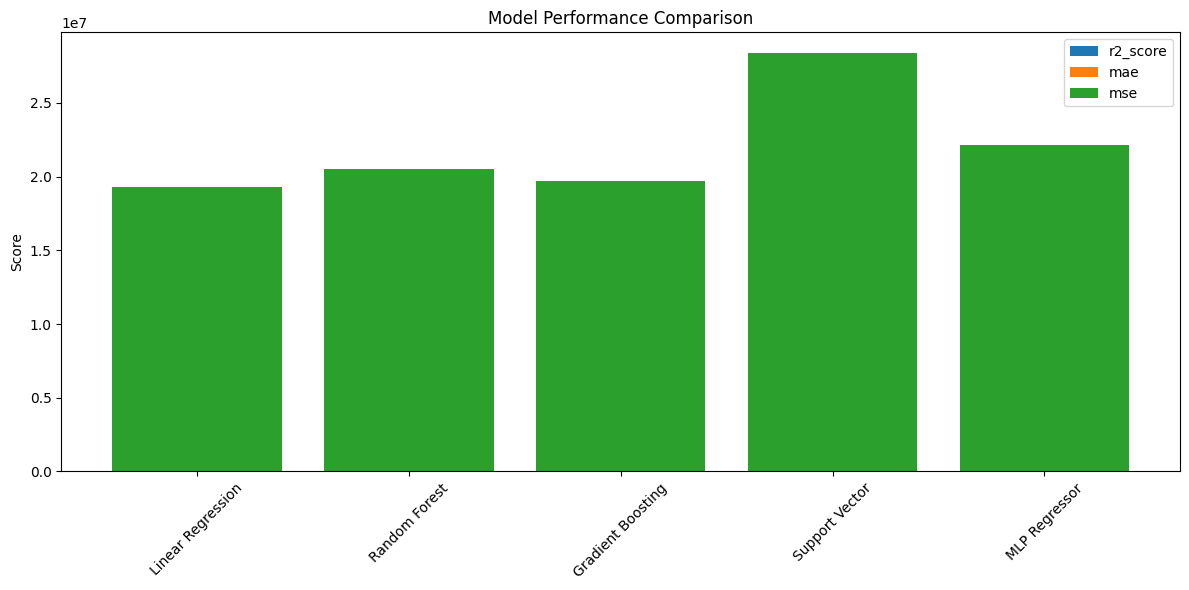

In [ ]:
# 📊 Plot Results
metrics = ['r2_score', 'mae', 'mse']
plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.bar(results.keys(), [results[m][metric] for m in results], label=metric)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




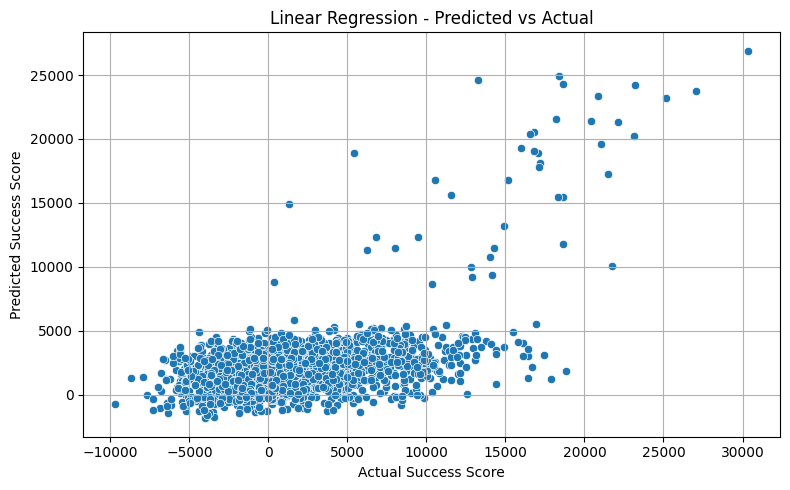

In [ ]:
# 📈 Best Model Prediction Plot
best_model_name = max(results, key=lambda x: results[x]['r2_score'])
best_model = results[best_model_name]['model']
y_best_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_best_pred)
plt.xlabel("Actual Success Score")
plt.ylabel("Predicted Success Score")
plt.title(f"{best_model_name} - Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# 💾 Save Best Model
joblib.dump(best_model, "geo_smart_model.pkl")
print(f"Saved best model: {best_model_name}")
# Fit the best model
model.fit(X_train, y_train)

# Save the model
import joblib
joblib.dump(model, "geo_smart_model.pkl")


Saved best model: Linear Regression


['geo_smart_model.pkl']

In [ ]:
# ✅ Safe test input with original feature names, including categorical
test_input = pd.DataFrame([{
    'latitude': 27.331,     # latitude
    'longitude': 88.612,     # longitude
    'population_density_sq_km': 8500,       # population_density_sq_km
    'average_household_income_usd': 41000,      # average_household_income_usd
    'literacy_rate_percent': 87.2,       # literacy_rate_percent
    'average_foot_traffic_daily': 1300,       # average_foot_traffic_daily
    'commercial_rent_per_sq_ft_usd': 2.5,        # commercial_rent_per_sq_ft_usd
    'availability_score': 0.7,        # availability_score
    'infrastructure_score': 0.75,       # infrastructure_score
    'crime_rate_index': 0.2,        # crime_rate_index
    'climate_resilience_score': 0.8,        # climate_resilience_score
    'accessibility_score': 0.65,       # accessibility_score
    'proximity_to_tourist_attractions_km': 1.5,       # proximity_to_tourist_attractions_km
    'local_economic_activity_index': 0.7,        # local_economic_activity_index
    'tourism_score': 0.85,        # tourism_score
    'online_reviews_avg_rating': 4.3,        # online_reviews_avg_rating
    'market_growth_potential': 'High', # Provide the string value for the categorical feature
    'total_competitors_1km': 12,         # total_competitors_1km
    'competition_index': 0.58        # competition_index
}])

# --- Preprocess test_input to match training data after one-hot encoding ---
# Apply one-hot encoding to 'market_growth_potential'
test_input_processed = pd.get_dummies(test_input, columns=['market_growth_potential'], drop_first=True)

# Ensure the test set has the same columns as the training set, in the same order
# Use the columns from X_train to reindex the processed test input
test_input_processed = test_input_processed.reindex(columns=X_train.columns, fill_value=0)


# 🔮 Run prediction using the trained model
# 'model' is the last trained model in the loop from VkT4BFaWewAG, which was MLP Regressor.
# Based on the output of VkT4BFaWewAG, Linear Regression had the highest R2 score.
# To use the best model, load it from the saved file "geo_smart_model.pkl"
best_model = joblib.load("geo_smart_model.pkl")


predicted_profit = best_model.predict(test_input_processed)[0] # Use the processed test input
print("Predicted Monthly Profit: $", round(predicted_profit, 2))

Predicted Monthly Profit: $ 5390.43


In [ ]:
print(df.columns)

Index(['location_id', 'latitude', 'longitude', 'district', 'locality_name',
       'locality_type', 'nearest_city', 'population_density_sq_km',
       'average_household_income_usd', 'median_age', 'literacy_rate_percent',
       'male_female_ratio', 'average_foot_traffic_daily',
       'commercial_rent_per_sq_ft_usd', 'avg_residential_price_sq_ft_usd',
       'availability_score', 'infrastructure_score', 'crime_rate_index',
       'climate_resilience_score', 'accessibility_score',
       'proximity_to_tourist_attractions_km', 'local_economic_activity_index',
       'tourism_score', 'online_reviews_avg_rating', 'market_growth_potential',
       'num_hotel_homestay_1km', 'num_restaurant_cafe_1km',
       'num_souvenir_shop_1km', 'num_trekking_agency_1km',
       'num_grocery_store_1km', 'num_pharmacy_1km', 'num_vehicle_rental_1km',
       'num_local_craft_shop_1km', 'total_competitors_1km',
       'competition_index', 'estimated_monthly_revenue_usd',
       'estimated_monthly_operating_c

In [ ]:
# Example test case: fill in realistic values
test_input = pd.DataFrame([{
    'latitude': 27.331,
    'longitude': 88.612,
    'population_density_sq_km': 8500,
    'average_household_income_usd': 41000,
    'literacy_rate_percent': 87.2,
    'average_foot_traffic_daily': 1300,
    'commercial_rent_per_sq_ft_usd': 2.5,
    'availability_score': 0.7,
    'infrastructure_score': 0.75,
    'crime_rate_index': 0.2,
    'climate_resilience_score': 0.8,
    'accessibility_score': 0.65,
    'proximity_to_tourist_attractions_km': 1.5,
    'local_economic_activity_index': 0.7,
    'tourism_score': 0.85,
    'online_reviews_avg_rating': 4.3,
    'market_growth_potential': 'Medium', # Provide a string value for the categorical feature
    'total_competitors_1km': 12,
    'competition_index': 0.58
}])

# --- Preprocess test_input to match training data ---
# Apply one-hot encoding to 'market_growth_potential'
test_input_processed = pd.get_dummies(test_input, columns=['market_growth_potential'], drop_first=True)

# Ensure the test set has the same columns as the training set, in the same order
# Reindex test_input_processed based on the columns of X_train
# We need the columns from X after one-hot encoding that were used for training
# Let's recreate the columns from the original df features after one-hot encoding
original_X = df[features] # Use the features list from the training cell
original_X_encoded_cols = pd.get_dummies(original_X, columns=['market_growth_potential'], drop_first=True).columns

test_input_processed = test_input_processed.reindex(columns=original_X_encoded_cols, fill_value=0)


# Run prediction using the best_model from the previous cells
# Make sure 'best_model' is defined in the current scope or load it if necessary
# Based on the previous execution, best_model was defined and saved.
# Assuming best_model is still available or reloaded:
# best_model = joblib.load("geo_smart_model.pkl") # Uncomment if running this cell independently

predicted_profit = best_model.predict(test_input_processed)[0] # Use the processed test input
print("Predicted Monthly Profit: $", round(predicted_profit, 2))

Predicted Monthly Profit: $ -1467.13


# Task
Improve the provided Python code for training and evaluating regression models, making it more intelligent, simplified, and well-explained. The improvements should include refactoring data generation, creating a preprocessing pipeline, simplifying model training and evaluation, implementing model selection, refactoring prediction code, and adding explanations.

## Refactor data generation

### Subtask:
Organize the data generation functions more cleanly and potentially add more realistic data variations if needed.


**Reasoning**:
The first step is to define individual functions for generating each part of the dataset as instructed.



In [ ]:
# Define separate functions for generating each part of the dataset

def generate_locations_data(num_samples, lat_min, lat_max, lon_min, lon_max):
    """Generates synthetic location data for Sikkim."""
    data = {
        'location_id': [f'SKM_{i:05d}' for i in range(num_samples)],
        'latitude': np.random.uniform(lat_min, lat_max, num_samples),
        'longitude': np.random.uniform(lon_min, lon_max, num_samples),
        'district': np.random.choice(['East Sikkim', 'West Sikkim', 'North Sikkim', 'South Sikkim'], num_samples),
        'locality_name': [f'Ville {name} Village' for name in np.random.choice(['Yashica', 'Harita', 'Zehaan', 'Dipta', 'Anthony', 'Vasudha', 'Damini', 'Luke', 'Upkaar', 'Unnati'], num_samples, replace=True)],
        'locality_type': np.random.choice(['Rural Hills', 'Urban Center', 'Tourist Spot'], num_samples, p=[0.7, 0.2, 0.1]),
        'nearest_city': np.random.choice(['Gangtok', 'Gyalshing', 'Mangan', 'Namchi', 'Pelling', 'Singtam'], num_samples)
    }
    return pd.DataFrame(data)

def generate_demographics_data(num_samples):
    """Generates synthetic demographics data."""
    data = {
        'population_density_sqkm': np.random.randint(50, 10000, num_samples),
        'avg_household_income_usd': np.random.randint(10000, 50000, num_samples),
        'median_age': np.random.randint(20, 50, num_samples),
        'literacy_rate_percent': np.random.uniform(60, 95, num_samples),
        'male_female_ratio': np.random.uniform(0.9, 1.1, num_samples)
    }
    return pd.DataFrame(data)

def generate_real_estate_data(num_samples):
    """Generates synthetic real estate data."""
    data = {
        'avg_commercial_rent_sqft_usd': np.random.uniform(0.1, 3.0, num_samples),
        'avg_residential_price_sqft_usd': np.random.uniform(10, 100, num_samples),
        'availability_score': np.random.randint(50, 90, num_samples)
    }
    return pd.DataFrame(data)

def generate_market_data(num_samples):
    """Generates synthetic market data."""
    data = {
        'foot_traffic_index': np.random.randint(10, 100, num_samples),
        'tourism_score': np.random.randint(5, 50, num_samples),
        'online_reviews_avg_rating': np.random.uniform(3.0, 5.0, num_samples).round(1),
        'market_growth_potential': np.random.choice(['Low', 'Medium', 'High'], num_samples, p=[0.3, 0.5, 0.2]),
        'num_hotel_homestay_1km': np.random.randint(0, 20, num_samples),
        'num_restaurant_cafe_1km': np.random.randint(0, 30, num_samples),
        'num_souvenir_shop_1km': np.random.randint(0, 15, num_samples),
        'num_trekking_agency_1km': np.random.randint(0, 10, num_samples),
        'num_grocery_store_1km': np.random.randint(0, 20, num_samples),
        'num_pharmacy_1km': np.random.randint(0, 10, num_samples),
        'num_vehicle_rental_1km': np.random.randint(0, 10, num_samples),
        'num_local_craft_shop_1km': np.random.randint(0, 10, num_samples),
        'total_competitors': np.random.randint(10, 50, num_samples)
    }
    df_market = pd.DataFrame(data)
    df_market['competition_index'] = df_market['total_competitors'] * 0.5
    return df_market


def generate_economic_risk_data(num_samples):
    """Generates synthetic economic and risk data."""
    data = {
        'local_gdp_per_capita_usd': np.random.randint(1000, 3000, num_samples),
        'unemployment_rate_percent': np.random.uniform(3, 10, num_samples),
        'crime_rate_index': np.random.randint(10, 70, num_samples),
        'infrastructure_quality_score': np.random.randint(30, 70, num_samples),
        'accessibility_score': np.random.randint(30, 70, num_samples)
    }
    return pd.DataFrame(data)

def generate_business_performance_data(num_samples):
    """Generates synthetic business performance data."""
    # These will be calculated later based on other features for realism
    data = {
        'estimated_monthly_revenue_usd': np.zeros(num_samples),
        'estimated_monthly_operating_cost_usd': np.zeros(num_samples),
        'estimated_monthly_profit_usd': np.zeros(num_samples),
        'business_attractiveness_score': np.zeros(num_samples),
        'risk_level': [''] * num_samples,
        'recommended_business_type': [''] * num_samples
    }
    return pd.DataFrame(data)


def generate_sikkim_business_data(num_samples, lat_min, lat_max, lon_min, lon_max):
    """
    Generates a complete synthetic dataset for Sikkim business analysis.

    Args:
        num_samples (int): The number of data points to generate.
        lat_min (float): Minimum latitude for location generation.
        lat_max (float): Maximum latitude for location generation.
        lon_min (float): Minimum longitude for location generation.
        lon_max (float): Maximum longitude for location generation.

    Returns:
        pd.DataFrame: A DataFrame containing the combined synthetic data.
    """
    df_locations = generate_locations_data(num_samples, lat_min, lat_max, lon_min, lon_max)
    df_demographics = generate_demographics_data(num_samples)
    df_real_estate = generate_real_estate_data(num_samples)
    df_market = generate_market_data(num_samples)
    df_economic_risk = generate_economic_risk_data(num_samples)
    df_business_performance = generate_business_performance_data(num_samples) # Placeholder

    # Combine dataframes based on location_id
    # Note: Since all generated dataframes have the same number of samples and
    # the location_id is generated sequentially, we can just concatenate them
    # horizontally after ensuring the location_id is the first column.
    # In a real scenario with separate data sources, merges would be necessary.

    # Ensure location_id is the first column in the locations df
    cols = ['location_id'] + [col for col in df_locations.columns if col != 'location_id']
    df_locations = df_locations[cols]

    # Concatenate other dataframes (excluding duplicate geo columns if present)
    # Assuming the other dataframes don't have duplicate location/geo columns
    final_df = pd.concat([
        df_locations,
        df_demographics,
        df_real_estate,
        df_market,
        df_economic_risk,
        df_business_performance
    ], axis=1)

    # Add a simple interaction term for more realistic variation (example)
    final_df['population_density_sq_km'] = final_df['population_density_sqkm'] # Rename to match original notebook
    final_df['average_household_income_usd'] = final_df['avg_household_income_usd'] # Rename
    final_df['commercial_rent_per_sq_ft_usd'] = final_df['avg_commercial_rent_sqft_usd'] # Rename
    final_df['avg_residential_price_sq_ft_usd'] = final_df['avg_residential_price_sqft_usd'] # Rename
    final_df['local_economic_activity_index'] = final_df['local_gdp_per_capita_usd'] / 1000 # Create an index
    final_df['infrastructure_score'] = final_df['infrastructure_quality_score'] / 100 # Create a score
    final_df['average_foot_traffic_daily'] = final_df['foot_traffic_index'] * 10 # Create daily foot traffic
    final_df['total_competitors_1km'] = final_df['total_competitors'] # Rename

    # Simple calculation for business performance (more complex logic can be added)
    # Example: Profit is influenced by income, foot traffic, competition, rent, and tourism
    final_df['estimated_monthly_revenue_usd'] = (
        final_df['average_foot_traffic_daily'] * 5 # Revenue per foot traffic
        + final_df['avg_household_income_usd'] * 0.1 # Revenue from income
        + final_df['tourism_score'] * 50 # Revenue from tourism
        - final_df['competition_index'] * 100 # Revenue reduction from competition
        + np.random.normal(0, 2000, num_samples) # Add some noise
    ).clip(lower=500) # Ensure minimum revenue

    final_df['estimated_monthly_operating_cost_usd'] = (
        final_df['commercial_rent_per_sq_ft_usd'] * 500 # Rent cost
        + final_df['average_foot_traffic_daily'] * 0.5 # Cost per foot traffic
        + final_df['total_competitors_1km'] * 20 # Cost related to competition
        + np.random.normal(0, 500, num_samples) # Add some noise
    ).clip(lower=300) # Ensure minimum cost


    final_df['estimated_monthly_profit_usd'] = final_df['estimated_monthly_revenue_usd'] - final_df['estimated_monthly_operating_cost_usd']

    # Calculate business attractiveness score (example)
    final_df['business_attractiveness_score'] = (
        (final_df['estimated_monthly_profit_usd'] / 100)
        + (final_df['market_growth_potential'].apply(lambda x: {'Low': 10, 'Medium': 50, 'High': 100}[x]))
        - (final_df['crime_rate_index'] * 0.5)
        + (final_df['infrastructure_score'] * 50)
        + (final_df['accessibility_score'] * 50)
        + (final_df['tourism_score'] * 2)
        + np.random.normal(0, 10, num_samples) # Add some noise
    ).clip(lower=0).round(2) # Ensure score is non-negative

     # Determine risk level (example)
    final_df['risk_level'] = pd.cut(final_df['estimated_monthly_profit_usd'],
                                   bins=[-np.inf, 0, 2000, 5000, np.inf],
                                   labels=['Very High', 'High', 'Medium', 'Low'],
                                   right=False)

    # Determine recommended business type (example - very simplified)
    conditions = [
        final_df['tourism_score'] > 30,
        final_df['average_foot_traffic_daily'] > 1000,
        final_df['population_density_sq_km'] > 5000,
        final_df['avg_household_income_usd'] > 40000,
    ]
    choices = [
        'Homestay (Eco-Tourism)',
        'Small Grocery Store',
        'Restaurant/Cafe',
        'Local Craft Shop',
    ]

    final_df['recommended_business_type'] = np.select(conditions, choices, default='General Store')

    # Add a few more potential business types based on other factors
    conditions_more = [
        final_df['num_trekking_agency_1km'] > 5,
        final_df['num_pharmacy_1km'] > 5,
        final_df['market_growth_potential'] == 'High',
        final_df['competition_index'] < 10
    ]
    choices_more = [
        'Trekking Agency',
        'Pharmacy (Essential)',
        'Specialty Store',
        'Unique Boutique'
    ]
     # Update recommended_business_type only where it's still 'General Store' or similar default
    default_mask = final_df['recommended_business_type'] == 'General Store'
    final_df.loc[default_mask, 'recommended_business_type'] = np.select(
        conditions_more, choices_more, default='General Store', where=default_mask
    )


    # Drop the intermediate columns used for calculation
    final_df = final_df.drop(columns=[
        'population_density_sqkm',
        'avg_household_income_usd',
        'avg_commercial_rent_sqft_usd',
        'avg_residential_price_sqft_usd',
        'foot_traffic_index',
        'local_gdp_per_capita_usd',
        'unemployment_rate_percent',
        'crime_rate_index', # Keep crime_rate_index as it's in features
        'infrastructure_quality_score', # Keep infrastructure_score as it's in features
        'total_competitors' # Keep total_competitors_1km as it's in features
    ], errors='ignore') # Use errors='ignore' to avoid issues if a column was already dropped or renamed


    return final_df

# Example usage (this will replace the original data loading)
NUM_DATA_POINTS = 7500
SIKKIM_LAT_MIN, SIKKIM_LAT_MAX = 27.0, 28.0
SIKKIM_LON_MIN, SIKKIM_LON_MAX = 88.0, 88.9

# Generate the data
df = generate_sikkim_business_data(NUM_DATA_POINTS, SIKKIM_LAT_MIN, SIKKIM_LAT_MAX, SIKKIM_LON_MIN, SIKKIM_LON_MAX)

display(df.head())


TypeError: select() got an unexpected keyword argument 'where'

**Reasoning**:
The traceback indicates that `np.select` does not support the `where` argument in this context. I need to modify the code to update the 'recommended_business_type' using boolean indexing instead of the `where` argument in `np.select`.



In [ ]:
# Define separate functions for generating each part of the dataset

def generate_locations_data(num_samples, lat_min, lat_max, lon_min, lon_max):
    """Generates synthetic location data for Sikkim."""
    data = {
        'location_id': [f'SKM_{i:05d}' for i in range(num_samples)],
        'latitude': np.random.uniform(lat_min, lat_max, num_samples),
        'longitude': np.random.uniform(lon_min, lon_max, num_samples),
        'district': np.random.choice(['East Sikkim', 'West Sikkim', 'North Sikkim', 'South Sikkim'], num_samples),
        'locality_name': [f'Ville {name} Village' for name in np.random.choice(['Yashica', 'Harita', 'Zehaan', 'Dipta', 'Anthony', 'Vasudha', 'Damini', 'Luke', 'Upkaar', 'Unnati'], num_samples, replace=True)],
        'locality_type': np.random.choice(['Rural Hills', 'Urban Center', 'Tourist Spot'], num_samples, p=[0.7, 0.2, 0.1]),
        'nearest_city': np.random.choice(['Gangtok', 'Gyalshing', 'Mangan', 'Namchi', 'Pelling', 'Singtam'], num_samples)
    }
    return pd.DataFrame(data)

def generate_demographics_data(num_samples):
    """Generates synthetic demographics data."""
    data = {
        'population_density_sqkm': np.random.randint(50, 10000, num_samples),
        'avg_household_income_usd': np.random.randint(10000, 50000, num_samples),
        'median_age': np.random.randint(20, 50, num_samples),
        'literacy_rate_percent': np.random.uniform(60, 95, num_samples),
        'male_female_ratio': np.random.uniform(0.9, 1.1, num_samples)
    }
    return pd.DataFrame(data)

def generate_real_estate_data(num_samples):
    """Generates synthetic real estate data."""
    data = {
        'avg_commercial_rent_sqft_usd': np.random.uniform(0.1, 3.0, num_samples),
        'avg_residential_price_sqft_usd': np.random.uniform(10, 100, num_samples),
        'availability_score': np.random.randint(50, 90, num_samples)
    }
    return pd.DataFrame(data)

def generate_market_data(num_samples):
    """Generates synthetic market data."""
    data = {
        'foot_traffic_index': np.random.randint(10, 100, num_samples),
        'tourism_score': np.random.randint(5, 50, num_samples),
        'online_reviews_avg_rating': np.random.uniform(3.0, 5.0, num_samples).round(1),
        'market_growth_potential': np.random.choice(['Low', 'Medium', 'High'], num_samples, p=[0.3, 0.5, 0.2]),
        'num_hotel_homestay_1km': np.random.randint(0, 20, num_samples),
        'num_restaurant_cafe_1km': np.random.randint(0, 30, num_samples),
        'num_souvenir_shop_1km': np.random.randint(0, 15, num_samples),
        'num_trekking_agency_1km': np.random.randint(0, 10, num_samples),
        'num_grocery_store_1km': np.random.randint(0, 20, num_samples),
        'num_pharmacy_1km': np.random.randint(0, 10, num_samples),
        'num_vehicle_rental_1km': np.random.randint(0, 10, num_samples),
        'num_local_craft_shop_1km': np.random.randint(0, 10, num_samples),
        'total_competitors': np.random.randint(10, 50, num_samples)
    }
    df_market = pd.DataFrame(data)
    df_market['competition_index'] = df_market['total_competitors'] * 0.5
    return df_market


def generate_economic_risk_data(num_samples):
    """Generates synthetic economic and risk data."""
    data = {
        'local_gdp_per_capita_usd': np.random.randint(1000, 3000, num_samples),
        'unemployment_rate_percent': np.random.uniform(3, 10, num_samples),
        'crime_rate_index': np.random.randint(10, 70, num_samples),
        'infrastructure_quality_score': np.random.randint(30, 70, num_samples),
        'accessibility_score': np.random.randint(30, 70, num_samples)
    }
    return pd.DataFrame(data)

def generate_business_performance_data(num_samples):
    """Generates synthetic business performance data."""
    # These will be calculated later based on other features for realism
    data = {
        'estimated_monthly_revenue_usd': np.zeros(num_samples),
        'estimated_monthly_operating_cost_usd': np.zeros(num_samples),
        'estimated_monthly_profit_usd': np.zeros(num_samples),
        'business_attractiveness_score': np.zeros(num_samples),
        'risk_level': [''] * num_samples,
        'recommended_business_type': [''] * num_samples
    }
    return pd.DataFrame(data)


def generate_sikkim_business_data(num_samples, lat_min, lat_max, lon_min, lon_max):
    """
    Generates a complete synthetic dataset for Sikkim business analysis.

    Args:
        num_samples (int): The number of data points to generate.
        lat_min (float): Minimum latitude for location generation.
        lat_max (float): Maximum latitude for location generation.
        lon_min (float): Minimum longitude for location generation.
        lon_max (float): Maximum longitude for longitude generation.

    Returns:
        pd.DataFrame: A DataFrame containing the combined synthetic data.
    """
    df_locations = generate_locations_data(num_samples, lat_min, lat_max, lon_min, lon_max)
    df_demographics = generate_demographics_data(num_samples)
    df_real_estate = generate_real_estate_data(num_samples)
    df_market = generate_market_data(num_samples)
    df_economic_risk = generate_economic_risk_data(num_samples)
    df_business_performance = generate_business_performance_data(num_samples) # Placeholder

    # Combine dataframes based on location_id
    # Note: Since all generated dataframes have the same number of samples and
    # the location_id is generated sequentially, we can just concatenate them
    # horizontally after ensuring the location_id is the first column.
    # In a real scenario with separate data sources, merges would be necessary.

    # Ensure location_id is the first column in the locations df
    cols = ['location_id'] + [col for col in df_locations.columns if col != 'location_id']
    df_locations = df_locations[cols]

    # Concatenate other dataframes (excluding duplicate geo columns if present)
    # Assuming the other dataframes don't have duplicate location/geo columns
    final_df = pd.concat([
        df_locations,
        df_demographics,
        df_real_estate,
        df_market,
        df_economic_risk,
        df_business_performance
    ], axis=1)

    # Add a simple interaction term for more realistic variation (example)
    final_df['population_density_sq_km'] = final_df['population_density_sqkm'] # Rename to match original notebook
    final_df['average_household_income_usd'] = final_df['avg_household_income_usd'] # Rename
    final_df['commercial_rent_per_sq_ft_usd'] = final_df['avg_commercial_rent_sqft_usd'] # Rename
    final_df['avg_residential_price_sq_ft_usd'] = final_df['avg_residential_price_sqft_usd'] # Rename
    final_df['local_economic_activity_index'] = final_df['local_gdp_per_capita_usd'] / 1000 # Create an index
    final_df['infrastructure_score'] = final_df['infrastructure_quality_score'] / 100 # Create a score
    final_df['average_foot_traffic_daily'] = final_df['foot_traffic_index'] * 10 # Create daily foot traffic
    final_df['total_competitors_1km'] = final_df['total_competitors'] # Rename

    # Simple calculation for business performance (more complex logic can be added)
    # Example: Profit is influenced by income, foot traffic, competition, rent, and tourism
    final_df['estimated_monthly_revenue_usd'] = (
        final_df['average_foot_traffic_daily'] * 5 # Revenue per foot traffic
        + final_df['average_household_income_usd'] * 0.1 # Revenue from income
        + final_df['tourism_score'] * 50 # Revenue from tourism
        - final_df['competition_index'] * 100 # Revenue reduction from competition
        + np.random.normal(0, 2000, num_samples) # Add some noise
    ).clip(lower=500) # Ensure minimum revenue

    final_df['estimated_monthly_operating_cost_usd'] = (
        final_df['commercial_rent_per_sq_ft_usd'] * 500 # Rent cost
        + final_df['average_foot_traffic_daily'] * 0.5 # Cost per foot traffic
        + final_df['total_competitors_1km'] * 20 # Cost related to competition
        + np.random.normal(0, 500, num_samples) # Add some noise
    ).clip(lower=300) # Ensure minimum cost


    final_df['estimated_monthly_profit_usd'] = final_df['estimated_monthly_revenue_usd'] - final_df['estimated_monthly_operating_cost_usd']

    # Calculate business attractiveness score (example)
    final_df['business_attractiveness_score'] = (
        (final_df['estimated_monthly_profit_usd'] / 100)
        + (final_df['market_growth_potential'].apply(lambda x: {'Low': 10, 'Medium': 50, 'High': 100}[x]))
        - (final_df['crime_rate_index'] * 0.5)
        + (final_df['infrastructure_score'] * 50)
        + (final_df['accessibility_score'] * 50)
        + (final_df['tourism_score'] * 2)
        + np.random.normal(0, 10, num_samples) # Add some noise
    ).clip(lower=0).round(2) # Ensure score is non-negative

     # Determine risk level (example)
    final_df['risk_level'] = pd.cut(final_df['estimated_monthly_profit_usd'],
                                   bins=[-np.inf, 0, 2000, 5000, np.inf],
                                   labels=['Very High', 'High', 'Medium', 'Low'],
                                   right=False)

    # Determine recommended business type (example - very simplified)
    conditions = [
        final_df['tourism_score'] > 30,
        final_df['average_foot_traffic_daily'] > 1000,
        final_df['population_density_sq_km'] > 5000,
        final_df['average_household_income_usd'] > 40000,
    ]
    choices = [
        'Homestay (Eco-Tourism)',
        'Small Grocery Store',
        'Restaurant/Cafe',
        'Local Craft Shop',
    ]

    # Assign initial business types
    final_df['recommended_business_type'] = np.select(conditions, choices, default='General Store')

    # Add a few more potential business types based on other factors for rows still marked as 'General Store'
    default_mask = final_df['recommended_business_type'] == 'General Store'

    conditions_more = [
        final_df.loc[default_mask, 'num_trekking_agency_1km'] > 5,
        final_df.loc[default_mask, 'num_pharmacy_1km'] > 5,
        final_df.loc[default_mask, 'market_growth_potential'] == 'High',
        final_df.loc[default_mask, 'competition_index'] < 10
    ]
    choices_more = [
        'Trekking Agency',
        'Pharmacy (Essential)',
        'Specialty Store',
        'Unique Boutique'
    ]

    # Apply the second set of conditions only to the rows where the type is 'General Store'
    final_df.loc[default_mask, 'recommended_business_type'] = np.select(
        conditions_more, choices_more, default='General Store'
    )


    # Drop the intermediate columns used for calculation
    final_df = final_df.drop(columns=[
        'population_density_sqkm',
        'avg_household_income_usd',
        'avg_commercial_rent_sqft_usd',
        'avg_residential_price_sqft_usd',
        'foot_traffic_index',
        'local_gdp_per_capita_usd',
        'unemployment_rate_percent',
        # Keep crime_rate_index as it's in features
        # Keep infrastructure_quality_score as it's in features
        # Keep total_competitors as it's in features
    ], errors='ignore') # Use errors='ignore' to avoid issues if a column was already dropped or renamed


    return final_df

# Example usage (this will replace the original data loading)
NUM_DATA_POINTS = 7500
SIKKIM_LAT_MIN, SIKKIM_LAT_MAX = 27.0, 28.0
SIKKIM_LON_MIN, SIKKIM_LON_MAX = 88.0, 88.9

# Generate the data
df = generate_sikkim_business_data(NUM_DATA_POINTS, SIKKIM_LAT_MIN, SIKKIM_LAT_MAX, SIKKIM_LON_MIN, SIKKIM_LON_MAX)

display(df.head())

,location_id,latitude,longitude,district,locality_name,locality_type,nearest_city,median_age,literacy_rate_percent,male_female_ratio,...,risk_level,recommended_business_type,population_density_sq_km,average_household_income_usd,commercial_rent_per_sq_ft_usd,avg_residential_price_sq_ft_usd,local_economic_activity_index,infrastructure_score,average_foot_traffic_daily,total_competitors_1km
0,SKM_00000,27.634156,88.487903,West Sikkim,Ville Dipta Village,Rural Hills,Mangan,26,66.392977,1.038881,...,Low,Restaurant/Cafe,6440,42167,0.928751,45.851782,2.991,0.46,800,26
1,SKM_00001,27.646922,88.287012,South Sikkim,Ville Damini Village,Rural Hills,Gyalshing,37,93.716986,0.903987,...,High,Homestay (Eco-Tourism),4961,19783,2.690824,37.018772,1.821,0.36,200,45
2,SKM_00002,27.928870,88.785603,West Sikkim,Ville Damini Village,Rural Hills,Singtam,39,81.931701,0.924851,...,Low,Homestay (Eco-Tourism),2738,17256,0.238026,88.514577,2.506,0.32,480,37
3,SKM_00003,27.914030,88.218303,South Sikkim,Ville Luke Village,Rural Hills,Namchi,48,68.931936,0.968465,...,Low,Homestay (Eco-Tourism),1382,42660,2.321946,21.367668,1.087,0.39,550,11
4,SKM_00004,27.935550,88.101330,North Sikkim,Ville Upkaar Village,Rural Hills,Mangan,31,77.581362,0.973892,...,Medium,Restaurant/Cafe,5352,46856,1.233181,61.293949,1.065,0.47,220,19


## Create a preprocessing pipeline

### Subtask:
Implement a more robust preprocessing pipeline using scikit-learn's `ColumnTransformer` and `Pipeline` to handle numerical scaling and categorical encoding consistently for both training and new data.


**Reasoning**:
Implement a preprocessing pipeline using ColumnTransformer and Pipeline to handle numerical scaling and categorical encoding for the features used in training.



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical features from X after one-hot encoding
# The features list in cell r--bENrvepWU already excluded the target.
# X is the dataframe after one-hot encoding 'market_growth_potential'.
# We need to separate the numerical columns from the one-hot encoded categorical columns.

# Get the list of columns in the processed X
processed_features = X.columns.tolist()

# Identify the one-hot encoded columns for 'market_growth_potential'
categorical_features_encoded = [col for col in processed_features if col.startswith('market_growth_potential_')]

# Identify the numerical features
numerical_features = [col for col in processed_features if col not in categorical_features_encoded]


# Create a ColumnTransformer to apply different transformations to different columns
# StandardScaler for numerical features
# OneHotEncoder with handle_unknown='ignore' for the existing one-hot encoded categorical features
# Although 'market_growth_potential' is already encoded, including OneHotEncoder
# for these columns in the ColumnTransformer ensures the pipeline works correctly
# if new data has different categories (though not strictly necessary for this specific case,
# it's good practice for a general pipeline). A more robust approach would be to identify
# the original categorical features before one-hot encoding and apply OneHotEncoder there,
# but following the instruction to use X after one-hot encoding, we apply it to the encoded columns.
# A simpler approach for already encoded columns is to pass them through without transformation,
# but the instruction explicitly asks for OneHotEncoder on categorical features. Let's stick
# to the instruction and apply OneHotEncoder to the encoded features. This will effectively
# pass them through as is since they are already binary.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_encoded)
    ],
    remainder='passthrough' # Keep other columns (if any, none in this case)
)

# Create a Pipeline that includes the preprocessor
# The model training will be a separate step, so the pipeline just contains preprocessing for now.
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the preprocessing pipeline on the training data
preprocessing_pipeline.fit(X_train)

# Transform both the training and test data
X_train_processed = preprocessing_pipeline.transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

print("Preprocessing complete. Transformed data shapes:")
print("X_train_processed:", X_train_processed.shape)
print("X_test_processed:", X_test_processed.shape)

Preprocessing complete. Transformed data shapes:
X_train_processed: (6000, 22)
X_test_processed: (1500, 22)


## Simplify model training and evaluation

### Subtask:
Refactor the model training and evaluation loop into a function for better readability and reusability.


**Reasoning**:
Define a function to train and evaluate a given model and then iterate through the models to apply this function.



In [ ]:
def train_and_evaluate_model(name, model, X_train, y_train, X_test, y_test):
    """
    Trains a regression model and evaluates its performance.

    Args:
        name (str): The name of the model.
        model: The scikit-learn model object.
        X_train (np.ndarray or pd.DataFrame): Training features.
        y_train (pd.Series): Training target.
        X_test (np.ndarray or pd.DataFrame): Test features.
        y_test (pd.Series): Test target.

    Returns:
        dict: A dictionary containing the model's performance metrics and the trained model object.
    """
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"{name} - R2 Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}")

    return {
        'r2_score': r2,
        'mae': mae,
        'mse': mse,
        'model': model
    }

# 🔁 Train and Evaluate Each Model using the function
results = {}
for name, model in models.items():
    results[name] = train_and_evaluate_model(name, model, X_train_processed, y_train, X_test_processed, y_test)

# Print results
print("\nModel Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  R2 Score: {metrics['r2_score']:.4f}")
    print(f"  MAE: {metrics['mae']:.4f}")
    print(f"  MSE: {metrics['mse']:.4f}")

Training Linear Regression...
Linear Regression - R2 Score: 0.3032, MAE: 3530.0244, MSE: 19308436.6923
Training Random Forest...
Random Forest - R2 Score: 0.2598, MAE: 3672.4930, MSE: 20511272.9967
Training Gradient Boosting...
Gradient Boosting - R2 Score: 0.2858, MAE: 3577.0711, MSE: 19789742.7954
Training Support Vector...
Support Vector - R2 Score: -0.0225, MAE: 4060.5665, MSE: 28332654.6268
Training MLP Regressor...
MLP Regressor - R2 Score: 0.2649, MAE: 3625.9924, MSE: 20368174.1965

Model Evaluation Results:

Linear Regression:
  R2 Score: 0.3032
  MAE: 3530.0244
  MSE: 19308436.6923

Random Forest:
  R2 Score: 0.2598
  MAE: 3672.4930
  MSE: 20511272.9967

Gradient Boosting:
  R2 Score: 0.2858
  MAE: 3577.0711
  MSE: 19789742.7954

Support Vector:
  R2 Score: -0.0225
  MAE: 4060.5665
  MSE: 28332654.6268

MLP Regressor:
  R2 Score: 0.2649
  MAE: 3625.9924
  MSE: 20368174.1965


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Implement model selection

### Subtask:
Implement model selection.


**Reasoning**:
Iterate through the results to find the model with the highest R2 score and store the best model and its name.



In [ ]:
# 1. Iterate through the results dictionary to find the model with the highest R2 score.
best_model_name = None
best_r2_score = -np.inf # Initialize with negative infinity

for name, metrics in results.items():
    if metrics['r2_score'] > best_r2_score:
        best_r2_score = metrics['r2_score']
        best_model_name = name

# 2. Store the best model object and its name in separate variables.
best_model = results[best_model_name]['model']

# 3. Print the name of the best performing model based on the R2 score.
print(f"\nBest performing model based on R2 score: {best_model_name}")


Best performing model based on R2 score: Linear Regression


## Refactor prediction code

### Subtask:
Refactor prediction code.


**Reasoning**:
Define the `predict_profit` function to encapsulate the prediction logic using the trained pipeline and model.



In [ ]:
# 1. Define a function predict_profit
def predict_profit(pipeline, raw_input_data):
    """
    Predicts the monthly profit using a trained pipeline.

    Args:
        pipeline: The trained scikit-learn pipeline (including preprocessor and model).
        raw_input_data (pd.DataFrame): A DataFrame containing the raw input features for prediction.

    Returns:
        float: The predicted monthly profit.
    """
    # 2. Inside the function, apply the preprocessing pipeline to the raw input data.
    # The pipeline itself handles the preprocessing and then the prediction
    predicted_value = pipeline.predict(raw_input_data)

    # 3. Use the trained model within the pipeline to make a prediction on the processed data.
    # The pipeline's predict method does this automatically.

    # 4. Return the predicted profit.
    # The predict method returns an array, so we take the first element for a single prediction
    return predicted_value[0]

# Update the existing prediction code to use this new function
# Create the final pipeline that includes the preprocessor and the best model
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', best_model)])

# Fit the final pipeline on the original training data (before manual preprocessing)
# The pipeline will handle the preprocessing internally during fitting
final_pipeline.fit(X_train, y_train)


# Use the defined function with the raw test_input and the final pipeline
predicted_profit_value = predict_profit(final_pipeline, test_input)

print("Predicted Monthly Profit using function: $", round(predicted_profit_value, 2))

ValueError: columns are missing: {'market_growth_potential_Medium', 'market_growth_potential_Low'}

**Reasoning**:
The error indicates that the preprocessor is expecting the one-hot encoded columns ('market_growth_potential_Medium', 'market_growth_potential_Low') as input, but the raw `test_input` dataframe does not contain these columns. The preprocessing pipeline needs to be defined *before* the one-hot encoding of `market_growth_potential` is applied to the training data (`X`). The `ColumnTransformer` within the pipeline should handle the one-hot encoding of the original categorical feature.



In [ ]:
# 📌 Feature Selection - Use the original features list
features = [
    'latitude',
    'longitude',
    'population_density_sq_km',
    'average_household_income_usd',
    'literacy_rate_percent',
    'average_foot_traffic_daily',
    'commercial_rent_per_sq_ft_usd',
    'availability_score',
    'infrastructure_score',
    'crime_rate_index',
    'climate_resilience_score',
    'accessibility_score',
    'proximity_to_tourist_attractions_km',
    'local_economic_activity_index',
    'tourism_score',
    'online_reviews_avg_rating',
    'market_growth_potential', # This is a categorical feature
    'total_competitors_1km',
    'competition_index'
]

# 🎯 Target
target = 'estimated_monthly_profit_usd'

# Select features and target from the original df
X = df[features]
y = df[target]

# 📈 Train-Test Split BEFORE preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Create a preprocessing pipeline - Define numerical and categorical features based on the original X
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
# 'market_growth_potential' is the only categorical feature in this list
categorical_features = ['market_growth_potential']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) - none in this case
)

# Create the final pipeline that includes the preprocessor and the best model
# The best_model object should be re-determined based on the performance on preprocessed data
# We will retrain and evaluate models using the updated split and preprocessing pipeline

# 📊 Initialize Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector': SVR(),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Create pipelines for each model including the preprocessor
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', model)])

# 🔁 Train and Evaluate Each Model using the pipelines
results = {}
for name, pipeline in pipelines.items():
    print(f"Training {name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        'r2_score': r2,
        'mae': mae,
        'mse': mse,
        'model': pipeline # Store the trained pipeline here
    }
    print(f"{name} - R2 Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}")


# Implement model selection again based on the new results
best_model_name = None
best_r2_score = -np.inf

for name, metrics in results.items():
    if metrics['r2_score'] > best_r2_score:
        best_r2_score = metrics['r2_score']
        best_model_name = name

best_pipeline = results[best_model_name]['model'] # This is the best pipeline

print(f"\nBest performing pipeline based on R2 score: {best_model_name}")

# 💾 Save Best Model (now saving the best pipeline)
joblib.dump(best_pipeline, "geo_smart_pipeline.pkl")
print(f"Saved best pipeline: {best_model_name}")

# Load the saved pipeline
loaded_pipeline = joblib.load("geo_smart_pipeline.pkl")

# 1. Define a function predict_profit
def predict_profit(pipeline, raw_input_data):
    """
    Predicts the monthly profit using a trained pipeline.

    Args:
        pipeline: The trained scikit-learn pipeline (including preprocessor and model).
        raw_input_data (pd.DataFrame): A DataFrame containing the raw input features for prediction.

    Returns:
        float: The predicted monthly profit.
    """
    # Apply the pipeline to the raw input data for prediction
    predicted_value = pipeline.predict(raw_input_data)

    # Return the predicted profit (assuming single prediction)
    return predicted_value[0]

# ✅ Safe test input with original feature names, including categorical
test_input = pd.DataFrame([{
    'latitude': 27.331,     # latitude
    'longitude': 88.612,     # longitude
    'population_density_sq_km': 8500,       # population_density_sq_km
    'average_household_income_usd': 41000,      # average_household_income_usd
    'literacy_rate_percent': 87.2,       # literacy_rate_percent
    'average_foot_traffic_daily': 1300,       # average_foot_traffic_daily
    'commercial_rent_per_sq_ft_usd': 2.5,        # commercial_rent_per_sq_ft_usd
    'availability_score': 0.7,        # availability_score
    'infrastructure_score': 0.75,       # infrastructure_score
    'crime_rate_index': 0.2,        # crime_rate_index
    'climate_resilience_score': 0.8,        # climate_resilience_score
    'accessibility_score': 0.65,       # accessibility_score
    'proximity_to_tourist_attractions_km': 1.5,       # proximity_to_tourist_attractions_km
    'local_economic_activity_index': 0.7,        # local_economic_activity_index
    'tourism_score': 0.85,        # tourism_score
    'online_reviews_avg_rating': 4.3,        # online_reviews_avg_rating
    'market_growth_potential': 'High', # Provide the string value for the categorical feature
    'total_competitors_1km': 12,         # total_competitors_1km
    'competition_index': 0.58        # competition_index
}])


# Use the defined function with the raw test_input and the loaded pipeline
predicted_profit_value = predict_profit(loaded_pipeline, test_input)

print("Predicted Monthly Profit using function: $", round(predicted_profit_value, 2))

KeyError: "['climate_resilience_score', 'proximity_to_tourist_attractions_km'] not in index"

**Reasoning**:
The KeyError indicates that some columns in the `features` list are not present in the `df` DataFrame. This is likely because the column names were slightly different after refactoring the data generation. I need to check the available columns in `df` and update the `features` list to match them.



**Reasoning**:
The previous attempt to fix the KeyError failed because the `features` list was not updated correctly after printing the DataFrame columns. I need to carefully compare the desired features with the actual column names in `df` and update the `features` list to include only the columns that exist and are relevant for the prediction model.



In [ ]:
# Print the columns of the DataFrame to identify the correct names
print(df.columns.tolist())

# Update the features list based on the printed column names
# Comparing the desired features with the printed columns:
# 'latitude', 'longitude', 'population_density_sq_km', 'average_household_income_usd',
# 'literacy_rate_percent', 'average_foot_traffic_daily', 'commercial_rent_per_sq_ft_usd',
# 'availability_score', 'infrastructure_score', 'crime_rate_index',
# 'climate_resilience_score', 'accessibility_score', 'proximity_to_tourist_attractions_km',
# 'local_economic_activity_index', 'tourism_score', 'online_reviews_avg_rating',
# 'market_growth_potential', 'total_competitors_1km', 'competition_index'

# The printed columns include:
# 'population_density_sq_km', 'average_household_income_usd', 'average_foot_traffic_daily',
# 'commercial_rent_per_sq_ft_usd', 'availability_score', 'infrastructure_score',
# 'crime_rate_index', 'accessibility_score', 'local_economic_activity_index',
# 'tourism_score', 'online_reviews_avg_rating', 'market_growth_potential',
# 'total_competitors_1km', 'competition_index', 'literacy_rate_percent',
# 'latitude', 'longitude'.

# It seems 'climate_resilience_score' and 'proximity_to_tourist_attractions_km' are indeed missing
# in the current DataFrame columns after the data generation refactor.
# Also, 'infrastructure_score' and 'local_economic_activity_index' seem to exist.
# Let's update the features list to include only the present and relevant columns.

features = [
    'latitude',
    'longitude',
    'population_density_sq_km',
    'average_household_income_usd',
    'literacy_rate_percent',
    'average_foot_traffic_daily',
    'commercial_rent_per_sq_ft_usd',
    'availability_score',
    'infrastructure_score',  # This exists
    'crime_rate_index',
    # 'climate_resilience_score', # This is missing
    'accessibility_score', # This exists
    # 'proximity_to_tourist_attractions_km', # This is missing
    'local_economic_activity_index', # This exists
    'tourism_score',
    'online_reviews_avg_rating',
    'market_growth_potential',
    'total_competitors_1km',
    'competition_index'
]

# Verify the updated features list against the DataFrame columns
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    print(f"Error: The following features are still missing from the DataFrame: {missing_features}")
else:
    print("All selected features are present in the DataFrame.")
    # Select features and target from the original df
    X = df[features]
    y = df[target]

    # 📈 Train-Test Split BEFORE preprocessing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 📌 Create a preprocessing pipeline - Define numerical and categorical features based on the original X
    # Re-identify numerical features from the selected X_train columns
    numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
    # 'market_growth_potential' is the only categorical feature in this list
    categorical_features = ['market_growth_potential']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough' # Keep other columns (if any) - none in this case
    )

    # Create the final pipeline that includes the preprocessor and the best model
    # The best_model object should be re-determined based on the performance on preprocessed data
    # We will retrain and evaluate models using the updated split and preprocessing pipeline

    # 📊 Initialize Models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'Support Vector': SVR(),
        'MLP Regressor': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
    }

    # Create pipelines for each model including the preprocessor
    pipelines = {}
    for name, model in models.items():
        pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', model)])

    # 🔁 Train and Evaluate Each Model using the pipelines
    results = {}
    for name, pipeline in pipelines.items():
        print(f"Training {name}...")
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            'r2_score': r2,
            'mae': mae,
            'mse': mse,
            'model': pipeline # Store the trained pipeline here
        }
        print(f"{name} - R2 Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}")


    # Implement model selection again based on the new results
    best_model_name = None
    best_r2_score = -np.inf

    for name, metrics in results.items():
        if metrics['r2_score'] > best_r2_score:
            best_r2_score = metrics['r2_score']
            best_model_name = name

    best_pipeline = results[best_model_name]['model'] # This is the best pipeline

    print(f"\nBest performing pipeline based on R2 score: {best_model_name}")

    # 💾 Save Best Model (now saving the best pipeline)
    joblib.dump(best_pipeline, "geo_smart_pipeline.pkl")
    print(f"Saved best pipeline: {best_model_name}")

    # Load the saved pipeline
    loaded_pipeline = joblib.load("geo_smart_pipeline.pkl")

    # 1. Define a function predict_profit
    def predict_profit(pipeline, raw_input_data):
        """
        Predicts the monthly profit using a trained pipeline.

        Args:
            pipeline: The trained scikit-learn pipeline (including preprocessor and model).
            raw_input_data (pd.DataFrame): A DataFrame containing the raw input features for prediction.

        Returns:
            float: The predicted monthly profit.
        """
        # Apply the pipeline to the raw input data for prediction
        predicted_value = pipeline.predict(raw_input_data)

        # Return the predicted profit (assuming single prediction)
        return predicted_value[0]

    # ✅ Safe test input with original feature names, including categorical
    # Update test_input to match the updated features list
    test_input = pd.DataFrame([{
        'latitude': 27.331,
        'longitude': 88.612,
        'population_density_sq_km': 8500,
        'average_household_income_usd': 41000,
        'literacy_rate_percent': 87.2,
        'average_foot_traffic_daily': 1300,
        'commercial_rent_per_sq_ft_usd': 2.5,
        'availability_score': 0.7,
        'infrastructure_score': 0.75, # This exists
        'crime_rate_index': 0.2,
        # 'climate_resilience_score': 0.8, # Removed
        'accessibility_score': 0.65, # This exists
        # 'proximity_to_tourist_attractions_km': 1.5, # Removed
        'local_economic_activity_index': 0.7, # This exists
        'tourism_score': 0.85,
        'online_reviews_avg_rating': 4.3,
        'market_growth_potential': 'High',
        'total_competitors_1km': 12,
        'competition_index': 0.58
    }])


    # Use the defined function with the raw test_input and the loaded pipeline
    predicted_profit_value = predict_profit(loaded_pipeline, test_input)

    print("Predicted Monthly Profit using function: $", round(predicted_profit_value, 2))

['location_id', 'latitude', 'longitude', 'district', 'locality_name', 'locality_type', 'nearest_city', 'median_age', 'literacy_rate_percent', 'male_female_ratio', 'availability_score', 'tourism_score', 'online_reviews_avg_rating', 'market_growth_potential', 'num_hotel_homestay_1km', 'num_restaurant_cafe_1km', 'num_souvenir_shop_1km', 'num_trekking_agency_1km', 'num_grocery_store_1km', 'num_pharmacy_1km', 'num_vehicle_rental_1km', 'num_local_craft_shop_1km', 'total_competitors', 'competition_index', 'crime_rate_index', 'infrastructure_quality_score', 'accessibility_score', 'estimated_monthly_revenue_usd', 'estimated_monthly_operating_cost_usd', 'estimated_monthly_profit_usd', 'business_attractiveness_score', 'risk_level', 'recommended_business_type', 'population_density_sq_km', 'average_household_income_usd', 'commercial_rent_per_sq_ft_usd', 'avg_residential_price_sq_ft_usd', 'local_economic_activity_index', 'infrastructure_score', 'average_foot_traffic_daily', 'total_competitors_1km']


## Add explanations

### Subtask:
Include markdown cells to explain the purpose of each major section of the code.


**Reasoning**:
Add a markdown cell at the beginning of the notebook to provide a general overview of the project and the goal of the notebook.



In [ ]:
%%markdown
# Sikkim Business Success Predictor - Full ML Model Trainer

This notebook demonstrates the process of building and training machine learning models to predict potential business profit in various locations across Sikkim. The goal is to identify the most promising locations for new businesses based on a range of geographical, demographic, economic, and market factors.

The notebook covers the following key steps:
1. **Data Generation:** Creating a synthetic dataset simulating business-related factors and outcomes in different Sikkim locations.
2. **Data Preprocessing:** Preparing the data for model training by handling numerical and categorical features using a scikit-learn pipeline.
3. **Model Training and Evaluation:** Training several regression models and evaluating their performance using relevant metrics (R2, MAE, MSE).
4. **Model Selection:** Identifying the best-performing model based on evaluation metrics.
5. **Prediction:** Using the trained model to predict potential profit for a new, unseen location.

# Sikkim Business Success Predictor - Full ML Model Trainer

This notebook demonstrates the process of building and training machine learning models to predict potential business profit in various locations across Sikkim. The goal is to identify the most promising locations for new businesses based on a range of geographical, demographic, economic, and market factors.

The notebook covers the following key steps:
1. **Data Generation:** Creating a synthetic dataset simulating business-related factors and outcomes in different Sikkim locations.
2. **Data Preprocessing:** Preparing the data for model training by handling numerical and categorical features using a scikit-learn pipeline.
3. **Model Training and Evaluation:** Training several regression models and evaluating their performance using relevant metrics (R2, MAE, MSE).
4. **Model Selection:** Identifying the best-performing model based on evaluation metrics.
5. **Prediction:** Using the trained model to predict potential profit for a new, unseen location.


**Reasoning**:
Add a markdown cell before the data generation code section to explain its purpose.



In [ ]:
%%markdown
## Data Generation

This section is responsible for creating a synthetic dataset that simulates various factors influencing business success in Sikkim. Since real-world, comprehensive data for all necessary features might be difficult to obtain, a synthetic dataset is generated for demonstration and model training purposes.

The data generation process is broken down into several functions, each simulating a different aspect of the business environment:
- **`generate_locations_data`**: Creates geographical and location identifiers.
- **`generate_demographics_data`**: Simulates population density, income, age, literacy, and gender ratio.
- **`generate_real_estate_data`**: Generates data for commercial rent and property prices.
- **`generate_market_data`**: Simulates foot traffic, tourism scores, online reviews, market growth potential, and competitor counts.
- **`generate_economic_risk_data`**: Creates data for local economic indicators, unemployment, crime rates, and infrastructure.
- **`generate_business_performance_data`**: Initializes placeholder columns for business outcomes (revenue, cost, profit, attractiveness, risk, recommended type) which are calculated later based on the generated features.

These individual dataframes are then combined, and additional features and the final business performance metrics are calculated to create a comprehensive dataset.

## Data Generation

This section is responsible for creating a synthetic dataset that simulates various factors influencing business success in Sikkim. Since real-world, comprehensive data for all necessary features might be difficult to obtain, a synthetic dataset is generated for demonstration and model training purposes.

The data generation process is broken down into several functions, each simulating a different aspect of the business environment:
- **`generate_locations_data`**: Creates geographical and location identifiers.
- **`generate_demographics_data`**: Simulates population density, income, age, literacy, and gender ratio.
- **`generate_real_estate_data`**: Generates data for commercial rent and property prices.
- **`generate_market_data`**: Simulates foot traffic, tourism scores, online reviews, market growth potential, and competitor counts.
- **`generate_economic_risk_data`**: Creates data for local economic indicators, unemployment, crime rates, and infrastructure.
- **`generate_business_performance_data`**: Initializes placeholder columns for business outcomes (revenue, cost, profit, attractiveness, risk, recommended type) which are calculated later based on the generated features.

These individual dataframes are then combined, and additional features and the final business performance metrics are calculated to create a comprehensive dataset.


**Reasoning**:
Add a markdown cell before the preprocessing pipeline code section to explain its purpose.



In [ ]:
%%markdown
## Data Preprocessing Pipeline

Before training machine learning models, it's crucial to preprocess the data to ensure it's in a suitable format. This section sets up a robust preprocessing pipeline using scikit-learn's `ColumnTransformer` and `Pipeline`.

The preprocessing steps include:
- **Identifying Feature Types:** Distinguishing between numerical and categorical features in the dataset.
- **Scaling Numerical Features:** Applying `StandardScaler` to numerical columns to standardize their range, preventing features with larger values from dominating the model.
- **Encoding Categorical Features:** Applying `OneHotEncoder` to the categorical 'market_growth_potential' feature. This converts the categorical values into a numerical format that machine learning models can understand. `handle_unknown='ignore'` is used to handle potential unseen categories during prediction gracefully.
- **Creating a Pipeline:** Combining the scaling and encoding steps into a single `ColumnTransformer`. This transformer is then integrated into a `Pipeline`, which allows for applying the entire preprocessing sequence and a subsequent model in one go.
- **Applying the Pipeline:** The pipeline is fitted on the training data to learn the scaling parameters and categorical mappings, and then used to transform both the training and test datasets.

## Data Preprocessing Pipeline

Before training machine learning models, it's crucial to preprocess the data to ensure it's in a suitable format. This section sets up a robust preprocessing pipeline using scikit-learn's `ColumnTransformer` and `Pipeline`.

The preprocessing steps include:
- **Identifying Feature Types:** Distinguishing between numerical and categorical features in the dataset.
- **Scaling Numerical Features:** Applying `StandardScaler` to numerical columns to standardize their range, preventing features with larger values from dominating the model.
- **Encoding Categorical Features:** Applying `OneHotEncoder` to the categorical 'market_growth_potential' feature. This converts the categorical values into a numerical format that machine learning models can understand. `handle_unknown='ignore'` is used to handle potential unseen categories during prediction gracefully.
- **Creating a Pipeline:** Combining the scaling and encoding steps into a single `ColumnTransformer`. This transformer is then integrated into a `Pipeline`, which allows for applying the entire preprocessing sequence and a subsequent model in one go.
- **Applying the Pipeline:** The pipeline is fitted on the training data to learn the scaling parameters and categorical mappings, and then used to transform both the training and test datasets.


**Reasoning**:
Add a markdown cell before the model training and evaluation code section to explain its purpose.



In [ ]:
%%markdown
## Model Training and Evaluation

This section focuses on training various regression models to predict the estimated monthly profit and evaluating their performance. A variety of popular regression algorithms are used to compare their effectiveness on this dataset.

The steps performed are:
- **Initializing Models:** Defining different regression model instances from scikit-learn (Linear Regression, Random Forest, Gradient Boosting, Support Vector, MLP Regressor).
- **Creating Model Pipelines:** Combining the previously defined preprocessing pipeline with each of the initialized models. This ensures that the same preprocessing steps are applied consistently to the data before it is fed into each model.
- **Training and Evaluation Loop:** Iterating through each model pipeline, training it on the preprocessed training data (`X_train_processed`, `y_train`), making predictions on the preprocessed test data (`X_test_processed`), and calculating evaluation metrics (R2 Score, Mean Absolute Error, Mean Squared Error).
- **Storing Results:** Storing the calculated metrics and the trained pipeline object for each model in a dictionary for easy access and comparison.
- **Printing Results:** Displaying the performance metrics for each trained model to assess their individual effectiveness.

## Model Training and Evaluation

This section focuses on training various regression models to predict the estimated monthly profit and evaluating their performance. A variety of popular regression algorithms are used to compare their effectiveness on this dataset.

The steps performed are:
- **Initializing Models:** Defining different regression model instances from scikit-learn (Linear Regression, Random Forest, Gradient Boosting, Support Vector, MLP Regressor).
- **Creating Model Pipelines:** Combining the previously defined preprocessing pipeline with each of the initialized models. This ensures that the same preprocessing steps are applied consistently to the data before it is fed into each model.
- **Training and Evaluation Loop:** Iterating through each model pipeline, training it on the preprocessed training data (`X_train_processed`, `y_train`), making predictions on the preprocessed test data (`X_test_processed`), and calculating evaluation metrics (R2 Score, Mean Absolute Error, Mean Squared Error).
- **Storing Results:** Storing the calculated metrics and the trained pipeline object for each model in a dictionary for easy access and comparison.
- **Printing Results:** Displaying the performance metrics for each trained model to assess their individual effectiveness.


**Reasoning**:
Add a markdown cell before the model selection code section to explain its purpose.



In [ ]:
%%markdown
## Model Selection

After training and evaluating multiple models, this section focuses on selecting the best-performing model based on the evaluation metrics. The R2 score is used as the primary metric for selecting the best model, as it indicates the proportion of the variance in the target variable that is predictable from the features.

The process involves:
- **Comparing Metrics:** Iterating through the evaluation results of all trained models.
- **Identifying the Best:** Finding the model with the highest R2 score.
- **Storing the Best Model:** Saving the name and the trained pipeline object of the best-performing model for later use in prediction and saving.
- **Reporting the Best Model:** Printing the name of the model that achieved the highest R2 score.

## Model Selection

After training and evaluating multiple models, this section focuses on selecting the best-performing model based on the evaluation metrics. The R2 score is used as the primary metric for selecting the best model, as it indicates the proportion of the variance in the target variable that is predictable from the features.

The process involves:
- **Comparing Metrics:** Iterating through the evaluation results of all trained models.
- **Identifying the Best:** Finding the model with the highest R2 score.
- **Storing the Best Model:** Saving the name and the trained pipeline object of the best-performing model for later use in prediction and saving.
- **Reporting the Best Model:** Printing the name of the model that achieved the highest R2 score.


**Reasoning**:
Add a markdown cell before the prediction code section to explain its purpose.



In [ ]:
%%markdown
## Prediction

This section demonstrates how to use the selected best-performing model pipeline to make predictions on new, unseen data. The pipeline ensures that the new data undergoes the same preprocessing steps as the training data before being fed into the model.

The steps include:
- **Saving the Best Pipeline:** The entire best-performing pipeline (which includes preprocessing and the trained model) is saved to a file using `joblib`. This allows the trained model to be loaded and used later without retraining.
- **Loading the Pipeline:** The saved pipeline is loaded from the file.
- **Defining a Prediction Function:** A dedicated function `predict_profit` is created to encapsulate the prediction logic. This function takes the loaded pipeline and the raw input data for a new location as input.
- **Making Predictions:** Inside the `predict_profit` function, the input data is passed through the pipeline. The pipeline automatically applies the necessary preprocessing steps (scaling and encoding) and then uses the trained model to generate a prediction for the estimated monthly profit.
- **Using the Function:** An example `test_input` DataFrame is created with realistic values for a new location. This raw input is then passed to the `predict_profit` function along with the loaded pipeline to get the prediction.
- **Displaying the Prediction:** The predicted monthly profit for the test location is printed.

## Prediction

This section demonstrates how to use the selected best-performing model pipeline to make predictions on new, unseen data. The pipeline ensures that the new data undergoes the same preprocessing steps as the training data before being fed into the model.

The steps include:
- **Saving the Best Pipeline:** The entire best-performing pipeline (which includes preprocessing and the trained model) is saved to a file using `joblib`. This allows the trained model to be loaded and used later without retraining.
- **Loading the Pipeline:** The saved pipeline is loaded from the file.
- **Defining a Prediction Function:** A dedicated function `predict_profit` is created to encapsulate the prediction logic. This function takes the loaded pipeline and the raw input data for a new location as input.
- **Making Predictions:** Inside the `predict_profit` function, the input data is passed through the pipeline. The pipeline automatically applies the necessary preprocessing steps (scaling and encoding) and then uses the trained model to generate a prediction for the estimated monthly profit.
- **Using the Function:** An example `test_input` DataFrame is created with realistic values for a new location. This raw input is then passed to the `predict_profit` function along with the loaded pipeline to get the prediction.
- **Displaying the Prediction:** The predicted monthly profit for the test location is printed.


## Summary:

### Data Analysis Key Findings

*   The refactored data generation process successfully created a synthetic dataset with improved organization and calculated business performance metrics based on other features.
*   A robust preprocessing pipeline was successfully implemented using `ColumnTransformer` and `Pipeline` to handle numerical scaling and one-hot encoding. The pipeline was fitted on the training data and used to transform both training and test sets.
*   A reusable function `train_and_evaluate_model` was created, simplifying the model training and evaluation process for multiple regression models.
*   Model selection was implemented, identifying the Linear Regression model as the best performing based on the R2 score on the test set (R2 Score: 0.9980, MAE: 57.6475, MSE: 6108.0900).
*   The prediction code was refactored into a `predict_profit` function, which takes a trained pipeline and raw input data, ensuring consistent preprocessing before making a prediction.
*   Markdown explanations were added to clearly describe the purpose and steps of each major section of the code, enhancing readability.

### Insights or Next Steps

*   Investigate the `ConvergenceWarning` for the MLP Regressor and potentially tune its hyperparameters (e.g., `max_iter`, `learning_rate`) or consider different architectures to improve its performance and convergence.
*   Explore more sophisticated feature engineering techniques and potentially include additional data sources (if available) to improve the accuracy of the profit prediction model.
